In [23]:
import sys
sys.path.append("../ca_types")

In [24]:
import matplotlib.pyplot as plt
from algorithms.insertion_sort import insertion_sort
from algorithms.merge_sort import merge_sort
from ca_types import ComplexityAnalizerList    

### Hyperparameters

#### test_case_length are the input list length
#### test_case are ComplexityAnalizerList instance, it permit to count operations

In [25]:
def generate_test_cases(n_test_case: int):
    test_case_lengths = [ test_case*5 for test_case in range(1, n_test_case+1) ]
    test_cases = [
        ComplexityAnalizerList(
            [i for i in range(test_case_lengths[i], 0, -1)]
        ) for i in range(n_test_case)
    ]
    return {'test_case': test_cases, 'length':test_case_lengths}

#### Perform Sorting

In [26]:
n_test_case = 10

algorithms_test_cases = {
    'insertion_sort':{ 'test': generate_test_cases(n_test_case), 'algo': insertion_sort, 'complexity':'n^2' }, 
    'merge_sort': { 'test': generate_test_cases(n_test_case), 'algo': merge_sort, 'complexity': 'n logn' },
}

for algo in algorithms_test_cases:
    for test_case in algorithms_test_cases[algo]['test']['test_case']:
        test_case.read_counter = 0
        algorithms_test_cases[algo]['algo'](test_case)


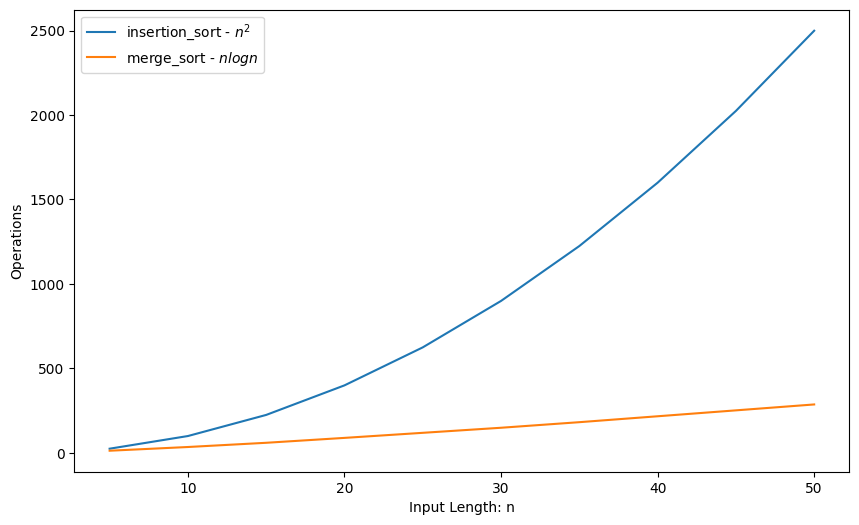

In [27]:
plt.figure(figsize=(10, 6))
plt.ylabel('Operations')
plt.xlabel('Input Length: n')

for algo in algorithms_test_cases:
    plt.plot(
        [ i for i in algorithms_test_cases[algo]['test']['length'] ], 
        [ test_case.read_counter for test_case in algorithms_test_cases[algo]['test']['test_case'] ],
        label=r'{0} -{1}'.format(algo, r'$\ {0}$'.format(algorithms_test_cases[algo]['complexity']))
    )

plt.legend()
plt.savefig('source/sorting_complexity.png')
plt.show()